> # **ElasticNet Regression**
> `Elastic Net Regression` is a regularized linear regression technique that combines the benefits of Lasso (L1 penalty) and Ridge (L2 penalty) regression. It addresses the limitations of both methods and is particularly useful for `high-dimensional datasets`.
> - `Penalty terms`: Elastic Net Regression adds two penalty terms to the standard least-squares objective function: L1 (Lasso) and L2 (Ridge) norms of the coefficient vector. These penalties are controlled by hyperparameters alpha (L1) and lambda (L2).
> - `Feature selection and shrinkage`: The L1 term performs feature selection by setting coefficients to zero (sparse solution), while the L2 term performs feature shrinkage by pulling coefficients toward zero.
> - `Combination of Lasso and Ridge`: Elastic Net Regression combines the strengths of both Lasso and Ridge regression, `allowing it to handle multicollinearity and overfitting`.

In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> ### ElasticNet Regression using `Gradient Descent`
> 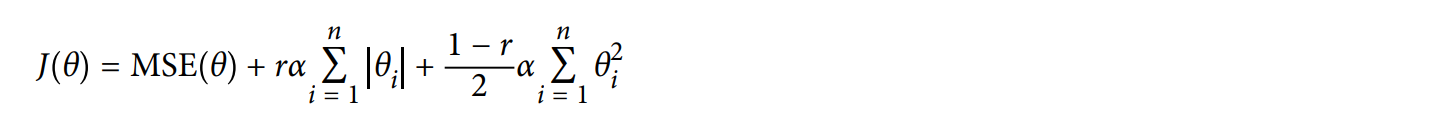

In [17]:
class ElasticNet:
    def __init__(self, lr, epochs, alpha, r) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
        self.alpha = alpha
        self.r = r
    
    def fit(self, X_train, y_train):
        # Convert to numpy arrays
        X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)

        # Initialize parameters
        self.coef_ = np.zeros((X_train.shape[1], 1))
        self.intercept_ = 0

        # Gradient Descent
        m = X_train.shape[0]  # Number of samples

        for _ in range(self.epochs):
            # Compute predictions - (n * 1)
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            # Compute gradients
            gradient_coefficients = ((-2/m) * np.dot(X_train.T,  y_train - y_hat)) + (self.r * self.alpha * np.sign(self.coef_)) + ((1-self.r) * (2 * self.alpha) * (self.coef_))
            gradient_intercept = (-2/m) * np.sum(y_train - y_hat)

            # Update coefficients
            self.coef_ -= self.lr * gradient_coefficients
            self.intercept_ -= self.lr * gradient_intercept

    def predict(self, X_train):
        return np.dot(X_train, self.coef_) + self.intercept_

In [25]:
model = ElasticNet(lr = 0.1, epochs = 5000, alpha = 0.01, r = 0.9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.45479016666038985

<hr>

> ### ElasticNet Regression - `sklearn`
> Hyperpapameters
> - `alpha`: a + b
> - `l1_ratio`: a / a + b : if this greater than 0.5 then ridge dominates, if less than 0.5 Lasso dominates

In [28]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha= 0.001, l1_ratio=0.5, max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4614452306964123

In [35]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty='elasticnet', alpha=0.01,  eta0 = 0.1, l1_ratio=0.9, max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4390301802173915

> Use `GridSearchCV()` for hyperparameter tuning